In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Dependencies

In [ ]:
# Import dependencies
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from preprocessing_utils import preprocess
from roi_extraction_utils import get_all_landmarks_ROI, get_inner_hand_surface_ROI
from utils import landmarks_available

### Set up Paths

In [ ]:
DATASET_DIRPATH = "/content/drive/MyDrive/DATASET_PROJECT"
PALMAR_TEST_DIRPATH = os.path.join(DATASET_DIRPATH, "palmar", "test")
DORSAL_TEST_DIRPATH = os.path.join(DATASET_DIRPATH, "dorsal", "test")
PALMAR_MODEL_DIRPATH  = "/content/drive/MyDrive/saved_palmar_model"
DORSAL_MODELS_DIRPATH = "/content/drive/MyDrive/saved_dorsal_models"

### Load Pre-trained Models

In [ ]:
# Load palmar model
palmar_model = load_model(os.path.join(PALMAR_MODEL_DIRPATH, "model_palmar.h5"))

# Load dorsal models
model_landmark_2  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_2.h5"))
model_landmark_3  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_3.h5"))
model_landmark_4  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_4.h5"))
model_landmark_5  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_5.h5"))
model_landmark_6  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_6.h5"))
model_landmark_7  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_7.h5"))
model_landmark_8  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_8.h5"))
model_landmark_9  = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_9.h5"))
model_landmark_10 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_10.h5"))
model_landmark_11 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_11.h5"))
model_landmark_12 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_12.h5"))
model_landmark_13 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_13.h5"))
model_landmark_14 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_14.h5"))
model_landmark_15 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_15.h5"))
model_landmark_16 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_16.h5"))
model_landmark_17 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_17.h5"))
model_landmark_18 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_18.h5"))
model_landmark_19 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_19.h5"))
model_landmark_20 = load_model(os.path.join(DORSAL_MODELS_DIRPATH, "model_landmark_20.h5"))

### Get all IDs

In [ ]:
def get_all_ids():
    ids = []
    fnames = os.listdir(os.path.join(DATASET_DIRPATH, "dorsal", "test"))
    for fname in fnames:
        # Get image id
        ID = re.search("[0-9]+", fname)
        ID = int(ID.group())
        
        if ID not in ids:
            ids.append(ID)
    return ids

In [ ]:
IDs = get_all_ids()
print(f"Total IDs: {len(IDs)}\n")
print(f"IDs:\n  {IDs}")

Total IDs: 162

IDs:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164]


### Select a Random ID

In [ ]:
ID = random.choice(IDs)
print(f"Selected ID: {ID}")

Selected ID: 89


### Get the Corresponding Palmar & Dorsal Image File

In [ ]:
def plot_images(palmar_img, palmar_fname, dorsal_img, dorsal_fname):
    # Plot the images
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(palmar_img)
    plt.title(palmar_fname)
    plt.axis(False)

    plt.subplot(1, 2, 2)
    plt.imshow(dorsal_img)
    plt.title(dorsal_fname)
    plt.axis(False);

In [ ]:
def get_ID_test_images(ID):
    files = [fname  for fname in os.listdir(PALMAR_TEST_DIRPATH)  if f"label-{ID}--" in fname]
    palmar_fname = random.choice(files)

    files = [fname  for fname in os.listdir(DORSAL_TEST_DIRPATH)  if f"label-{ID}--" in fname]
    dorsal_fname = random.choice(files)

    palmar_img = plt.imread(os.path.join(PALMAR_TEST_DIRPATH, palmar_fname))
    dorsal_img = plt.imread(os.path.join(DORSAL_TEST_DIRPATH, dorsal_fname))
    
    return palmar_img, palmar_fname, dorsal_img, dorsal_fname

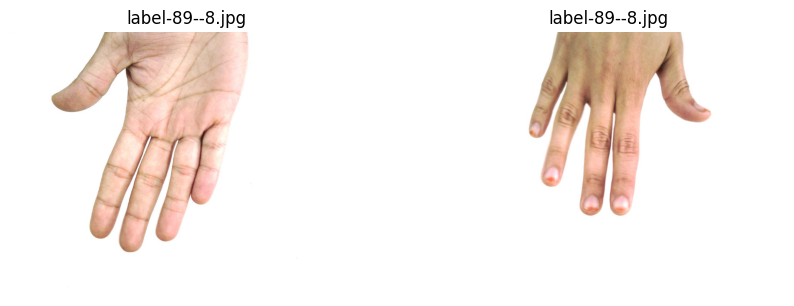

In [ ]:
palmar_img, palmar_fname, dorsal_img, dorsal_fname = get_ID_test_images(ID)
plot_images(palmar_img, palmar_fname, dorsal_img, dorsal_fname)

In [ ]:
def get_landmarks_roi_pred_probs(rois):
    dorsal_models = [
        model_landmark_2, model_landmark_3, model_landmark_4, model_landmark_5,
        model_landmark_6, model_landmark_7, model_landmark_8, model_landmark_9,
        model_landmark_10, model_landmark_11, model_landmark_12, model_landmark_13,
        model_landmark_14, model_landmark_15, model_landmark_16, model_landmark_17, 
        model_landmark_18, model_landmark_19, model_landmark_20]

    pred_probs = [model.predict(rois[i], verbose=0)  for i, model in enumerate(dorsal_models)]
    pred_probs_concat = np.squeeze(np.stack(pred_probs))

    print("Dorsal LANDMARK predictions")
    for i in range(pred_probs_concat.shape[0]):
        id = np.argmax(pred_probs_concat[i], axis=0)
        # id_prob = np.max(pred_probs_concat[i])
        print("\tlandmark %2s - predicted id: %d" % (i+2, id))
        # print(id_prob)

    return pred_probs_concat

## Final test Function

In [ ]:
def predict(palmar_img, dorsal_img):
    # Extract palmprint
    palmprint = get_inner_hand_surface_ROI(palmar_img, roi_h=224, roi_w=224)
    
    if palmprint is not None:
        palmprint = preprocess(palmprint)
        palmprint = palmprint[np.newaxis, :, :, :]
        palmar_pred_probs = palmar_model(palmprint)
        palmar_id = np.argmax(palmar_pred_probs, axis=1)
        print(f"For PALMAR image\n\t - predicted id: {palmar_id[0]}")
        print("-----------------------------------------------------")
    else:
        print("Unable to extract palmprint...")


    # Extract Finger Knuckle Print (FKP) and nails ROI
    if landmarks_available(dorsal_img):
        rois = get_all_landmarks_ROI(dorsal_img)
        preprocessed_rois =  [preprocess(roi)  for roi in rois]

        rois_arr = np.stack(preprocessed_rois, axis=0)
        rois_arr = rois_arr[:, np.newaxis, :, :]
        pred_probs_concat = get_landmarks_roi_pred_probs(rois_arr)
        
        dorsal_pred_probs = np.prod(pred_probs_concat, axis=0) # fused class probabilities
        ID_dorsal = np.argmax(dorsal_pred_probs, axis=0)
        print(f"\nFor DORSAL image\n\t- predicted id: {ID_dorsal}")
        print("-----------------------------------------------------")
    else:
        print("Unable to find landmarks...")
        print(f"\nFinal predicted id (on the bases of palmprint analysis): {palmar_id[0]}")
        return


    # Final Score level fusion
    pred_probs_final = np.stack((palmar_pred_probs, np.expand_dims(dorsal_pred_probs, axis=0)))
    
    fused_pred_probs = np.prod(pred_probs_final, axis=0)
    
    # Final prediction
    ID_final = np.argmax(dorsal_pred_probs, axis=0)
    print("FINAL prediction:")
    print(f"\t- predicted id: {ID_final}")

In [ ]:
predict(palmar_img, dorsal_img)

For PALMAR image
	 - predicted id: 89
-----------------------------------------------------
Dorsal LANDMARK predictions
	landmark  2 - predicted id: 89
	landmark  3 - predicted id: 57
	landmark  4 - predicted id: 89
	landmark  5 - predicted id: 89
	landmark  6 - predicted id: 89
	landmark  7 - predicted id: 89
	landmark  8 - predicted id: 89
	landmark  9 - predicted id: 89
	landmark 10 - predicted id: 89
	landmark 11 - predicted id: 89
	landmark 12 - predicted id: 89
	landmark 13 - predicted id: 89
	landmark 14 - predicted id: 89
	landmark 15 - predicted id: 89
	landmark 16 - predicted id: 89
	landmark 17 - predicted id: 14
	landmark 18 - predicted id: 89
	landmark 19 - predicted id: 89
	landmark 20 - predicted id: 89

For DORSAL image
	- predicted id: 89
-----------------------------------------------------
FINAL prediction:
	- predicted id: 89
